# NumPy vs CuPy (CPU vs GPU) Performance Benchmarks
This notebook investigates the performance improvements between the numpy and cupy libraries. The hardware used is state of the art components from top vendors. To test on your own hardware, you can either use the Jupyter Notebook (.ipynb) file, assuming cupy is correctly installed. Or try on Google CoLab (be sure to have a runtime with an NVIDIA GPU).

##  Local Development Hardware:
**CPU:** Intel Core i9-12900K <br>
**GPU:** NVIDIA Geforce RTX 3080 <br>

<a target="_blank" href="https://colab.research.google.com/github/dotimothy/AccelerationMethods/blob/main/NumpyVsCupy.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>  

In [1]:
# CoLab Check. If In CoLab then install some dependencies.
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
if(IN_COLAB):
    !pip install GPUtil

  Preparing metadata (setup.py) ... done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7393 sha256=0018394eb124ede5f5f82ed2da40c7042e4242f2b4ce1f363d36fd081aba1cd7
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built GPUtil


In [2]:
# Importing Libraries
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import time
import cpuinfo
import GPUtil

In [3]:
# Logistic Functions
def getCPUName():
    return cpuinfo.get_cpu_info()['brand_raw']

def getGPUName():
    gpus = GPUtil.getGPUs()
    return gpus[0].name

# Benchmarking Functions
def numpyBench(sz=10000):
    # Main Computation
    a = np.random.rand(sz,sz)
    start = time.time()
    b = a*a
    cpuTime = time.time()-start
    # Freeing Memory
    del a,b
    return cpuTime

def cupyBench(sz=10000):
    # Main Computation
    a = cp.random.rand(sz,sz)
    start = time.time()
    b = a*a
    gpuTime = time.time()-start
    # Freeing Memory
    del a,b
    cp._default_memory_pool.free_all_blocks()
    return gpuTime

In [4]:
# Getting Hardware Info
cpuName = getCPUName()
gpuName = getGPUName()

# Size of Square Matrix N
szs = [(10**i)+(10**(i))*j for i in range(5) for j in range(9)]
szs = [sz for sz in szs if sz<30000]

# Empty Lists of Times (Corresponding to szs)
cpuTimes = []
gpuTimes = []

In [5]:
# Benchmark
for sz in szs:
    cpuTimes.append(numpyBench(sz=sz))
    gpuTimes.append(cupyBench(sz=sz))

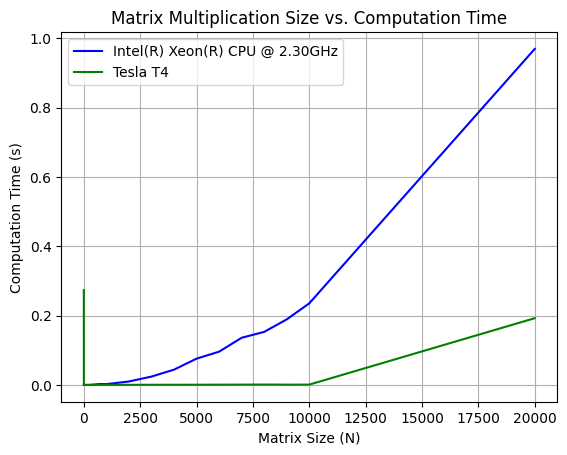

In [6]:
# Plot the Results (Changes each Time)
plt.figure()
plt.plot(szs,cpuTimes,'blue')
plt.plot(szs,gpuTimes,'green')
plt.grid()
xlabel = plt.xlabel('Matrix Size (N)')
ylabel = plt.ylabel('Computation Time (s)')
xscale = plt.xscale('linear')
yscale = plt.yscale('linear')
title = plt.title('Matrix Multiplication Size vs. Computation Time')
legend = plt.legend([cpuName,gpuName])